## Analysis "Evaluation on clinical dataset of AD patients and controls"
Here, we load the models trained on our main dataset (LUHA) and evaluate them on the ADReSS dataset.

The config used to produce the pre-trained models is:
- `/src/data_analysis/configs/regression_composite_scores/svr_different_feature_sets/reduced_features/other_tasks/cookieTheft/train_test/combined_audio_linguistic_shap_and_data.yaml`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import zoom_fft

from config.constants import Constants
from data_analysis.dataloader.dataloader import ADReSSDataLoader
from config.config import Config



/Users/jheitz/miniconda3/envs/dementia/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#TASK = 'pictureDescription'
TASK = 'cookieTheft'  # which trained model to use. For ADReSS, it's cookieTheft in any case

ONLY_PAR = True


config = Config.from_dict({'data_transformers': [], 
                            'config_audio_features': {'feature_version': 'reduced'},
                            'config_linguistic_features': {'feature_version': 'reduced'},
                           'config_data': {'task': 'cookieTheft', 'only_PAR': ONLY_PAR}
                           })

adress_dataloader = ADReSSDataLoader(config=config)
dataset = adress_dataloader.load_data()


No data split specified, loading train participants
Initializing dataloader ADReSS Dataloader (transcript_version google, task cookieTheft) Split train
Initializing dataloader ADReSS PITT audio
Using model chirp (en-US) with config {'enable_automatic_punctuation': True, 'max_alternatives': 1, 'enable_word_time_offsets': True}
Loading data using dataloader ADReSS PITT audio
Initializing Audio Cutter
Cutting only PAR segments from dataset Concatenate(ADReSS PITT audio (train), ADReSS PITT audio (test)) using Audio Cutter
     [Cache-To-File] Cache exists but is too old --> recalculating for AudioCutter.cut
     [Cache-To-File] Cache exists but is too old --> recalculating for AudioCutter.cut
     [Cache-To-File] Cache exists but is too old --> recalculating for AudioCutter.cut
     [Cache-To-File] Cache exists but is too old --> recalculating for AudioCutter.cut
     [Cache-To-File] Cache exists but is too old --> recalculating for AudioCutter.cut
     [Cache-To-File] Cache exists but is

In [3]:
type(dataset.mmse)

numpy.ndarray

In [4]:
from data_analysis.data_transformation.linguistic_features import LinguisticFeatures
from data_analysis.data_transformation.audio_features import AudioFeatures
from data_analysis.data_transformation.demographic_features import DemographicFeatures

CONSTANTS = Constants()
run_parameters = {}

config_data_transformers = ['Linguistic Features', 'Audio Features', 'Demographic Features']
data_transformers = []
if config_data_transformers is not None:
    for p in config_data_transformers:
        if p == "Linguistic Features":
            data_transformers.append(LinguisticFeatures(config=config, constants=CONSTANTS, run_parameters=run_parameters))
        elif p == "Audio Features":
            data_transformers.append(AudioFeatures(config=config, constants=CONSTANTS, run_parameters=run_parameters))
        elif p == "Demographic Features":
            data_transformers.append(DemographicFeatures(config=config, constants=CONSTANTS, run_parameters=run_parameters))
        elif p == "Outlier Removal and Imputation" or p == "Feature Standardizer":
            raise ValueError(f"{p} is no longer a data transformer. Instead it is implemented as a preprocessing step. This is to avoid data leakage (should not be run on the entire dataset). Update the config accordingly.")
        else:
            raise ValueError("Invalid data transformer:", p)
        pass

print("Data before transformations: ", dataset)
for p in data_transformers:
    print(f"Running data transformer {p}...")
    dataset = p.preprocess_dataset(dataset)
print("Data after transformations:", dataset)

2025-04-04 09:42:40 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Initializing Linguistic Features


2025-04-04 09:42:42 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-04-04 09:42:42 INFO: Using device: cpu
2025-04-04 09:42:42 INFO: Loading: tokenize
2025-04-04 09:42:42 INFO: Loading: pos
2025-04-04 09:42:42 INFO: Loading: lemma
2025-04-04 09:42:42 INFO: Loading: constituency
2025-04-04 09:42:42 INFO: Loading: depparse
2025-04-04 09:42:42 INFO: Loading: sentiment
2025-04-04 09:42:42 INFO: Loading: ner
2025-04-04 09:42:43 INFO: Done loading processors!


... using linguistic feature_groups ['literature_features', 'csunghye_features'], feature_version reduced, selected_features []
Initializing Audio Features
... running Wave2Vec2PhonemeTranscriber on device: cpu


Some weights of the model checkpoint at vitouphy/wav2vec2-xls-r-300m-timit-phoneme were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at vitouphy/wav2vec2-xls-r-300m-timit-phoneme and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You sho

... using audio feature_groups ['pause_features', 'phoneme_features', 'opensmile_features'], feature_version reduced, selected_features []
Initializing DemographicFeatures
... using selected_features []
Data before transformations:  Dataset ADReSS data (google cookieTheft) with variables [('sample_names', (155,)), ('audio_files', (155,)), ('transcripts', (155,)), ('demographics', (155, 4)), ('classification_target', (155,)), ('mmse', (155,))], config ({'data_transformers': '[]', 'debug': 'False'})
Running data transformer <data_analysis.data_transformation.linguistic_features.LinguisticFeatures object at 0x2e49bcd90>...
Calculating linguistic features for dataset Dataset ADReSS data (google cookieTheft) with variables [('sample_names', (155,)), ('audio_files', (155,)), ('transcripts', (155,)), ('demographics', (155, 4)), ('classification_target', (155,)), ('mmse', (155,))], config ({'data_transformers': '[]', 'debug': 'False'})
     [Cache-To-File] Getting value for LinguisticFeatures.

[nltk_data] Downloading package cmudict to /Users/jheitz/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


     [Cache-To-File] Getting value for LinguisticFeatures._load_csunghye_features_one from disk using arguments: ['well little boy reaching out for the cookie jar an...', '7e4de327b0005449756c8284ad52e15df74003bb'] and {}
     [Cache-To-File] Getting value for LinguisticFeatures._load_csunghye_features_one from disk using arguments: ['mhm, well this one is in the cookie jar, and this ...', '7e4de327b0005449756c8284ad52e15df74003bb'] and {}
     [Cache-To-File] Getting value for LinguisticFeatures._load_csunghye_features_one from disk using arguments: ["boy over here standing on the chair, it's falling ...", '7e4de327b0005449756c8284ad52e15df74003bb'] and {}
     [Cache-To-File] Getting value for LinguisticFeatures._load_csunghye_features_one from disk using arguments: ['you want me to tell you? okay uh the boys getting ...', '7e4de327b0005449756c8284ad52e15df74003bb'] and {}
     [Cache-To-File] Getting value for LinguisticFeatures._load_csunghye_features_one from disk using arguments:

In [5]:

def get_model_dir(task, target):
    if task == 'cookieTheft':
        if target == 'language':
            model_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_0719_ac73_cookieTheft_svr_reduced_feature_sets_train_test_shap_and_data/20250314_1509_combined_audio_linguistic_cookieTheft_composite_language_prrt"
        elif target == 'memory':
            model_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_0719_ac73_cookieTheft_svr_reduced_feature_sets_train_test_shap_and_data/20250314_1722_combined_audio_linguistic_cookieTheft_composite_memory_sgrl"
        elif target == 'executive_function':
            model_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_0719_ac73_cookieTheft_svr_reduced_feature_sets_train_test_shap_and_data/20250314_1742_combined_audio_linguistic_cookieTheft_composite_executive_function_iasx"
        elif target == 'speed':
            model_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_0719_ac73_cookieTheft_svr_reduced_feature_sets_train_test_shap_and_data/20250314_1801_combined_audio_linguistic_cookieTheft_composite_speed_fzwb"
        else: 
            raise ValueError("Invalid target:", target)
    elif task == 'pictureDescription':
        if target == 'language':
            model_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_1550_7a0f_svr_reduced_feature_sets_shap_and_data/20250314_1550_combined_audio_linguistic_pictureDescription_composite_language_zfmg"
        elif target == 'memory':
            model_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_1550_7a0f_svr_reduced_feature_sets_shap_and_data/20250314_1606_combined_audio_linguistic_pictureDescription_composite_memory_wnro"
        elif target == 'executive_function':
            model_dir = '/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_1550_7a0f_svr_reduced_feature_sets_shap_and_data/20250314_1622_combined_audio_linguistic_pictureDescription_composite_executive_function_uryt'
        elif target == 'speed':
            model_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_1550_7a0f_svr_reduced_feature_sets_shap_and_data/20250314_1638_combined_audio_linguistic_pictureDescription_composite_speed_mqxr"
        else:
            raise ValueError("Invalid target:", target)
            
    else:
        raise ValueError("Invalid task:", task)
        
    return model_dir



In [6]:
dataset.data_variables.keys()

dict_keys(['sample_names', 'audio_files', 'transcripts', 'demographics', 'classification_target', 'mmse', 'features'])

In [7]:
dataset.features.shape

(155, 69)

In [8]:
from data_analysis.data_preprocessing.feature_standardizer import FeatureStandardizer
from data_analysis.data_preprocessing.feature_outlier_removal_imputation import FeatureOutlierRemovalImputation
import pickle, os

targets = ['language', 'memory', 'executive_function', 'speed']

all_predictions = []
for target in targets:
    model_dir = get_model_dir(TASK, target)
    with open(os.path.join(model_dir, "outlier_removal_split0.pkl"), "rb") as f:
        feature_outlier_removal_imputation: FeatureOutlierRemovalImputation = pickle.load(f)
    with open(os.path.join(model_dir, "feature_standardizer_split0.pkl"), "rb") as f:
        feature_standardizer: FeatureStandardizer = pickle.load(f)
    with open(os.path.join(model_dir, "model_split0.pkl"), "rb") as f:
        model = pickle.load(f)

    # data preprocessing
    X_test = dataset.features.copy()
    X_test = feature_outlier_removal_imputation.transform(X_test, dataset.demographics, dataset.sample_names)
    X_test = feature_standardizer.transform(X_test)
    
    y_pred_test = model.predict(X_test)
    prediction_df = pd.DataFrame({
        f'prediction_{target}': y_pred_test,
        'label': dataset.classification_target,
        'mmse': dataset.mmse
    })
    all_predictions.append(prediction_df)



Transforming data: Outlier removal (based on previously calculated norms) and imputation (based on previously calculated fit)
... temporarily removing demographic columns from the features, for outlier detection: ['dem_age', 'dem_gender_unified', 'dem_education_binary', 'dem_country']
... [feature regression-based norms] Outcome:  lit_verb_noun_ratio
... [feature regression-based norms] Outcome:  lit_subordinate_coordinate_conjunction_ratio
... [feature regression-based norms] Outcome:  lit_adverb_ratio
... [feature regression-based norms] Outcome:  lit_noun_ratio
... [feature regression-based norms] Outcome:  lit_verb_ratio
... [feature regression-based norms] Outcome:  lit_pronoun_ratio
... [feature regression-based norms] Outcome:  lit_personal_pronoun_ratio
... [feature regression-based norms] Outcome:  lit_determiner_ratio
... [feature regression-based norms] Outcome:  lit_preposition_ratio
... [feature regression-based norms] Outcome:  lit_verb_present_participle_ratio
... [featu

In [9]:
dataset.data_variables.keys()

dict_keys(['sample_names', 'audio_files', 'transcripts', 'demographics', 'classification_target', 'mmse', 'features'])

In [10]:
def convert_to_float(val):
    try:
        return float(val)  
    except:
        return np.nan


In [11]:
all_predictions_df = pd.concat(all_predictions, axis=1)
assert np.all(all_predictions_df['label'].std(axis=1) == 0)  # make sure labels agree in all targets
all_predictions_df = all_predictions_df.loc[:,~all_predictions_df.columns.duplicated()]
all_predictions_df['prediction_mean'] = all_predictions_df.drop(columns=['label','mmse']).mean(axis=1)
all_predictions_df['prediction_median'] = all_predictions_df.drop(columns=['label','mmse']).median(axis=1)
all_predictions_df['mmse'] = all_predictions_df['mmse'].map(convert_to_float)
all_predictions_df

,prediction_language,label,mmse,prediction_memory,prediction_executive_function,prediction_speed,prediction_mean,prediction_median
0,-0.547171,1,18.0,-0.389419,-0.176330,-0.017060,-0.282495,-0.282495
1,-0.542871,1,13.0,-0.283895,-0.376481,-0.213641,-0.354222,-0.354222
2,-0.671544,1,14.0,-0.396795,-0.319416,-0.185522,-0.393319,-0.393319
3,-0.339529,1,20.0,-0.171584,-0.082581,-0.012154,-0.151462,-0.151462
4,-0.760963,1,17.0,-0.128583,-0.498158,-0.166237,-0.388485,-0.388485
...,...,...,...,...,...,...,...,...
150,-0.611171,1,18.0,-0.313623,-0.192966,0.018677,-0.274771,-0.274771
151,0.000242,0,28.0,-0.064776,0.274855,0.229006,0.109832,0.109832
152,-0.679686,1,23.0,-0.339676,-0.263523,-0.206903,-0.372447,-0.339676
153,-0.535112,0,28.0,-0.389372,-0.173666,-0.164568,-0.315680,-0.315680


In [12]:
from sklearn import metrics




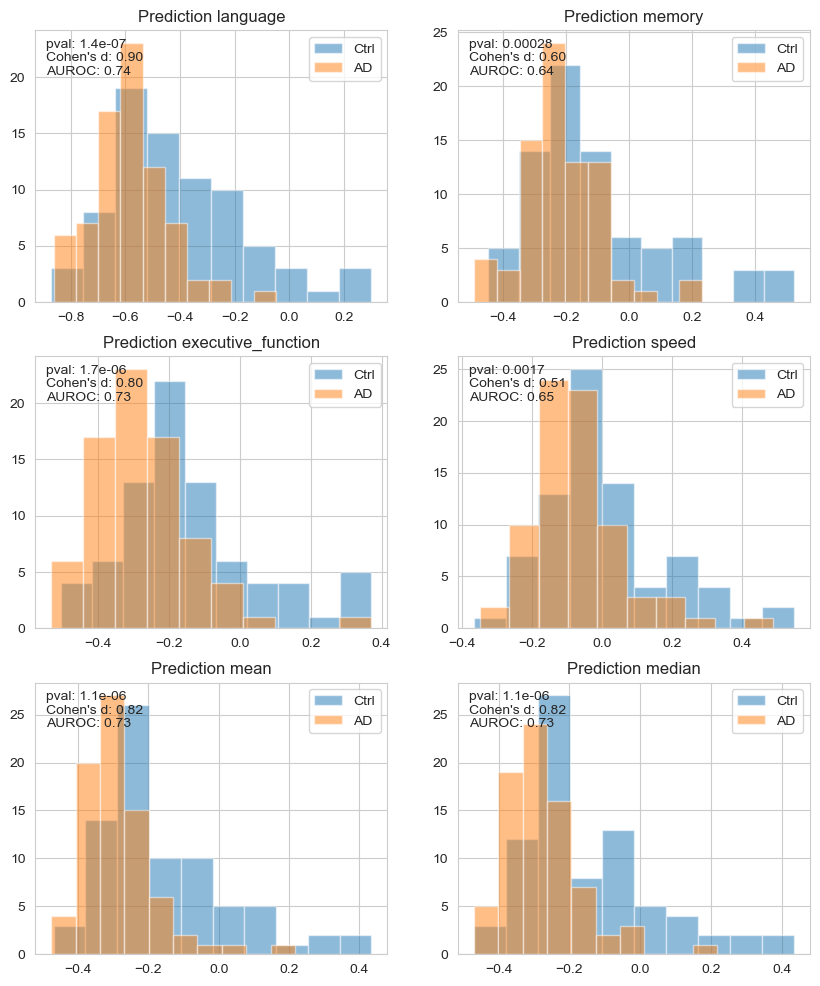

In [13]:
import scipy
import statistics
import math


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
axes = [ax for row in axes for ax in row]

for target, ax in zip(targets + ['mean', 'median'], axes):
    pred_ctrl = all_predictions_df.query("label == 0")[f'prediction_{target}']
    pred_ad = all_predictions_df.query("label == 1")[f'prediction_{target}']
    ax.hist(pred_ctrl, label='Ctrl', alpha=0.5)
    ax.hist(pred_ad, label='AD', alpha=0.5)
    ttest = scipy.stats.ttest_ind(pred_ctrl, pred_ad, equal_var=False)
    cohens_d = (statistics.mean(pred_ctrl) - statistics.mean(pred_ad)) / (math.sqrt((statistics.stdev(pred_ctrl) ** 2 + statistics.stdev(pred_ad) ** 2) / 2))
    auroc = metrics.roc_auc_score(all_predictions_df.label, -all_predictions_df[f'prediction_{target}'])

    ax.set_title(f"Prediction {target}")
    ax.text(0.03,.97, f"pval: {ttest.pvalue:.2g}\nCohen's d: {cohens_d:.2f}\nAUROC: {auroc:.2f}", transform = ax.transAxes, verticalalignment='top', horizontalalignment="left")
    ax.legend()

plt.show()


(155,)


array([0.44042221, 0.38750858, 0.32624233, 0.62385603, 0.29005129,
       0.40314847, 0.37099254, 0.48564696, 0.3893752 , 0.54768437,
       0.3508456 , 0.72797677, 0.47914977, 0.26115878, 0.35933202,
       0.35948238, 0.50474551, 0.42896781, 0.38506074, 0.57522784,
       0.61484412, 0.44360515, 0.44198938, 0.71340551, 0.42139929,
       0.41297041, 0.30620534, 0.55110601, 0.48467165, 0.57912753,
       0.27986466, 0.47219013, 0.42942994, 0.47041855, 0.28418083,
       0.47124917, 0.43861234, 0.48234472, 0.4984111 , 0.88465702,
       0.56534415, 0.5316053 , 0.34924851, 0.44096149, 0.35864784,
       0.34343389, 0.34516042, 0.41265422, 0.46263812, 0.68484335,
       0.34340363, 0.30310254, 0.23267111, 0.45930784, 0.41056694,
       0.47696135, 0.79443955, 0.4135491 , 0.48439913, 0.28695062,
       0.65073008, 0.5219878 , 0.81012436, 0.74770382, 0.55306758,
       0.48762491, 0.47508196, 0.44002095, 0.35527178, 0.48311954,
       0.91494837, 0.815748  , 0.43014866, 0.7590122 , 0.76471

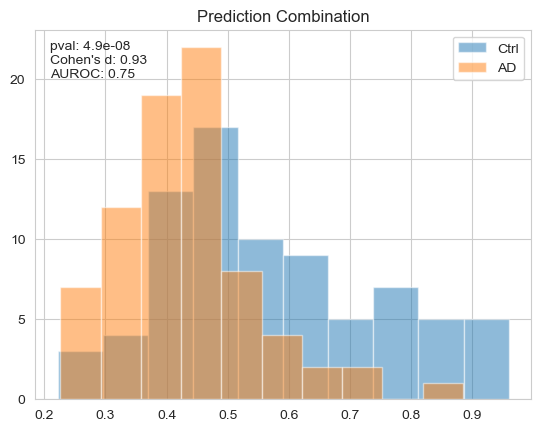

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(all_predictions_df.drop(columns=['label', 'mmse']), -all_predictions_df['label'])
pred = logreg.predict_proba(all_predictions_df.drop(columns=['label', 'mmse']))[:, 1]
#rf = RandomForestClassifier()
#rf.fit(all_predictions_df.drop(columns=['label']), -all_predictions_df['label'])
#pred = rf.predict_proba(all_predictions_df.drop(columns=['label']))[:, 1]

#pred = all_predictions_df.drop(columns=['label']).mean(axis=1)
print(pred.shape)
display(pred)

fig, ax = plt.subplots(nrows=1, ncols=1)
pred_ad = pred[all_predictions_df.label == 1]
pred_ctrl = pred[all_predictions_df.label == 0]
ax.hist(pred_ctrl, label='Ctrl', alpha=0.5)
ax.hist(pred_ad, label='AD', alpha=0.5)
ttest = scipy.stats.ttest_ind(pred_ctrl, pred_ad, equal_var=False)
cohens_d = (statistics.mean(pred_ctrl) - statistics.mean(pred_ad)) / (math.sqrt((statistics.stdev(pred_ctrl) ** 2 + statistics.stdev(pred_ad) ** 2) / 2))
auroc = metrics.roc_auc_score(all_predictions_df.label, -pred)

ax.set_title(f"Prediction Combination")
ax.text(0.03,.97, f"pval: {ttest.pvalue:.2g}\nCohen's d: {cohens_d:.2f}\nAUROC: {auroc:.2f}", transform = ax.transAxes, verticalalignment='top', horizontalalignment="left")

ax.legend()

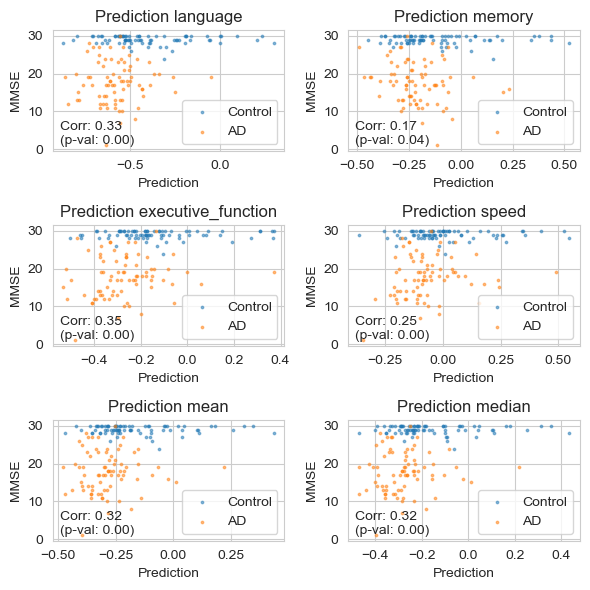

In [15]:
import scipy
import statistics
import math


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))
axes = [ax for row in axes for ax in row]

for target, ax in zip(targets + ['mean', 'median'], axes):
    pred_ctrl = all_predictions_df.query("label == 0")[f'prediction_{target}']
    pred_ad = all_predictions_df.query("label == 1")[f'prediction_{target}']
    mmse_ctrl = all_predictions_df.query("label == 0")['mmse']
    mmse_ad = all_predictions_df.query("label == 1")['mmse']
    
    ax.scatter(pred_ctrl, mmse_ctrl, s=3, alpha=0.5, label="Control")
    ax.scatter(pred_ad, mmse_ad, s=3, alpha=0.5, label="AD")
    ax.set_xlabel("Prediction")
    ax.set_ylabel("MMSE")

    pred_df_without_na = all_predictions_df[[f'prediction_{target}', 'mmse']].dropna()
    pred_here = pred_df_without_na[f'prediction_{target}']
    mmse = pred_df_without_na['mmse']
    mmse_corr = scipy.stats.pearsonr(pred_here, mmse)

    ax.set_title(f"Prediction {target}")
    ax.text(0.03,.03, f"Corr: {mmse_corr.statistic:.2f}\n(p-val: {mmse_corr.pvalue:.2f})", transform = ax.transAxes, verticalalignment='bottom', horizontalalignment="left")
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()



In [16]:
print(pred.shape, all_predictions_df.shape)

(155,) (155, 8)


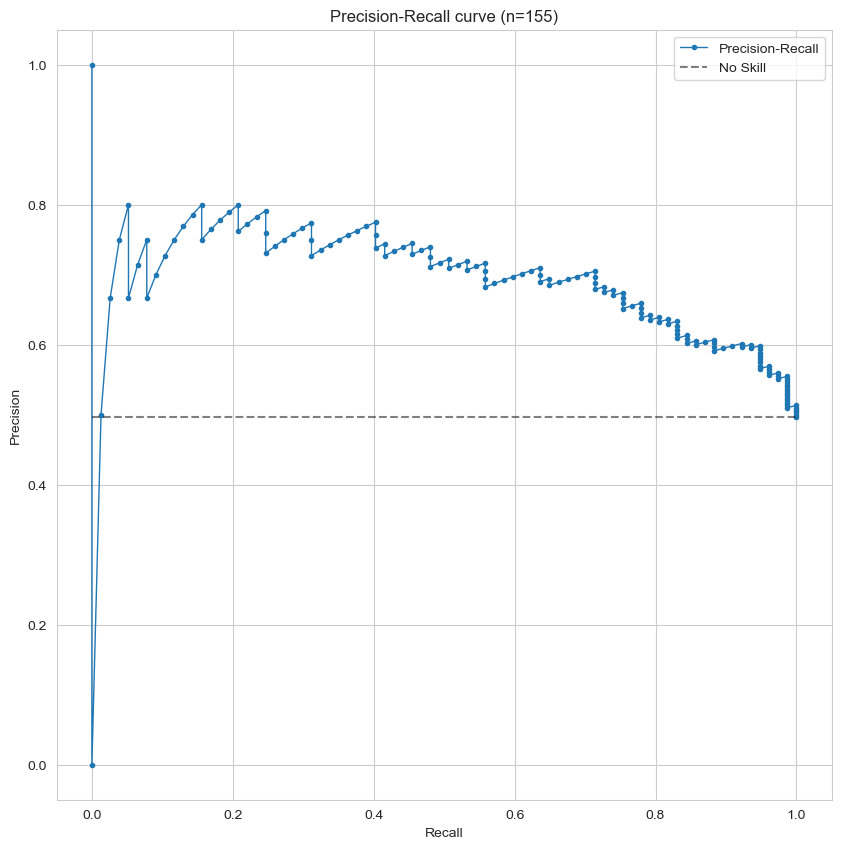

In [17]:
plt.figure(figsize=(10, 10))

# draw thicker line for total results
precisions, recalls, thresholds = metrics.precision_recall_curve(all_predictions_df.label, -pred)
#auc = metrics.auc(precisions, recalls)
no_skill = np.sum(all_predictions_df.label) / len(all_predictions_df.label)
plt.plot(recalls, precisions, label="Precision-Recall", lw=1, marker=".")
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', c='k', alpha=0.5)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve (n={len(pred)})')
plt.legend(loc='best')
#plt.savefig(file_path)
plt.show()

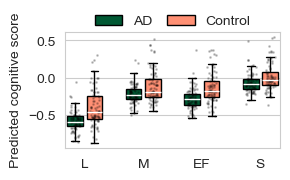

Group comparison                     
                             Effect size t-statistic  p-value
Language [L]                        0.90         5.6  1.4e-07
Memory [M]                          0.60         3.7  2.8e-04
Executive Function [EF]             0.80         5.0  1.7e-06
Speed [S]                           0.51         3.2  1.7e-03

In [20]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 2))
#axes = [ax for row in axes for ax in row]
target_label_mapping = {'speed': 'Speed [S]', 'language': 'Language [L]', 'executive_function': 'Executive Function [EF]', 'memory': 'Memory [M]'}
target_label_mapping_shortened = {'speed': 'S', 'language': 'L', 'executive_function': 'EF', 'memory': 'M'}


color_ad = "#005833"
color_ctrl = "#FF9074"

x_ticks = []
table = {}
for target, target_idx in zip(targets, range(len(targets))):
    pred_ctrl = all_predictions_df.query("label == 0")[f'prediction_{target}']
    pred_ad = all_predictions_df.query("label == 1")[f'prediction_{target}']
    position_ctrl, position_ad = target_idx*3+1, target_idx*3
    position_xtick = target_idx*3 + 0.5
    box_ad = ax.boxplot([pred_ad], positions=[position_ad], widths=0.8, showfliers=False, patch_artist=True)
    box_ctrl = ax.boxplot([pred_ctrl], positions=[position_ctrl], widths=0.8, showfliers=False, patch_artist=True)    
    label_ctrl = 'Control' if target_idx == 0 else None
    label_ad = 'AD' if target_idx == 0 else None
    plt.setp(box_ad['boxes'][0], facecolor=color_ad, label=label_ad)
    plt.setp(box_ctrl['boxes'][0], facecolor=color_ctrl, label=label_ctrl)
    plt.setp(box_ad['medians'][0], color="white",)
    plt.setp(box_ctrl['medians'][0], color="white", )
    
    ax.scatter(np.random.uniform(position_ad - 0.25, position_ad + 0.25, len(pred_ad)), pred_ad, alpha=0.2, s=1, color='k', zorder=2)
    ax.scatter(np.random.uniform(position_ctrl - 0.25, position_ctrl + 0.25, len(pred_ctrl)), pred_ctrl, alpha=0.2, s=1, color='k', zorder=2)

    
    x_ticks.append({'tick': position_xtick, 'label': target_label_mapping_shortened[target]})
    
    #ax.hist(pred_ad, label='AD', alpha=0.5)
    ttest = scipy.stats.ttest_ind(pred_ctrl, pred_ad, equal_var=False)
    cohens_d = (statistics.mean(pred_ctrl) - statistics.mean(pred_ad)) / (math.sqrt((statistics.stdev(pred_ctrl) ** 2 + statistics.stdev(pred_ad) ** 2) / 2))
    auroc = metrics.roc_auc_score(all_predictions_df.label, -all_predictions_df[f'prediction_{target}'])
    
    pred_df_without_na = all_predictions_df[[f'prediction_{target}', 'mmse']].dropna()
    pred = pred_df_without_na[f'prediction_{target}']
    mmse = pred_df_without_na['mmse']
    mmse_corr = scipy.stats.pearsonr(pred, mmse)
    
    pred_ad_df_without_na = all_predictions_df.query("label == 1")[[f'prediction_{target}', 'mmse']].dropna()
    pred_ad = pred_ad_df_without_na[f'prediction_{target}']
    mmse_ad = pred_ad_df_without_na['mmse']
    mmse_ad_corr = scipy.stats.pearsonr(pred_ad, mmse_ad)
    

    table[target_label_mapping[target]] = {
        ('Group comparison', 'Effect size'): f"{cohens_d:.2f}",
        ('Group comparison', 't-statistic'): f"{ttest.statistic:.1f}",
        ('Group comparison', 'p-value'): f"{ttest.pvalue:.1e}",
        #('MMSE Correlation', f'ρ'): f"{mmse_corr.statistic:.2f}",
        #('MMSE Correlation', f'p-val'): f"{mmse_corr.pvalue:.1e}",
        #('MMSE Correlation (AD group)', f'ρ'): f"{mmse_ad_corr.statistic:.2f}",
        #('MMSE Correlation (AD group)', f'p-val'): f"{mmse_ad_corr.pvalue:.2f}",
        #'MMSE', 'p-value'): f"{mmse_corr.pvalue:.1e}",
        #'AUROC': auroc
    }

ax.set_xticks([x_tick['tick'] for x_tick in x_ticks], [x_tick['label'] for x_tick in x_ticks])  #, rotation=45, ha='right', 
#ax.set_title(f"Group comparison")
#ax.text(0.03,.97, f"pval: {ttest.pvalue:.2g}\nCohen's d: {cohens_d:.2f}\nAUROC: {auroc:.2f}", transform = ax.transAxes, verticalalignment='top', horizontalalignment="left")
ax.legend(ncols=2, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.25), columnspacing=1)
ax.set_ylabel("Predicted cognitive score")
plt.grid(False, axis='x')
plt.tight_layout()
plt.show()

table_df = pd.DataFrame.from_dict(table, orient='index')
#table_df.columns = pd.MultiIndex.from_tuples([('')])
table_df


In [21]:

print(table_df.to_latex())

\begin{tabular}{llll}
\toprule
 & \multicolumn{3}{r}{Group comparison} \\
 & Effect size & t-statistic & p-value \\
\midrule
Language [L] & 0.90 & 5.6 & 1.4e-07 \\
Memory [M] & 0.60 & 3.7 & 2.8e-04 \\
Executive Function [EF] & 0.80 & 5.0 & 1.7e-06 \\
Speed [S] & 0.51 & 3.2 & 1.7e-03 \\
\bottomrule
\end{tabular}

